In [ ]:
#https://github.com/Haha89/paint-by-numbers
#https://codegolf.stackexchange.com/questions/42217/paint-by-numbers
#https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python
#https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html
#https://machinelearningknowledge.ai/image-segmentation-in-python-opencv/
#https://towardsdatascience.com/painting-and-sketching-with-opencv-in-python-4293026d78b
#https://stackoverflow.com/questions/44428315/similar-color-detection-in-python

In [1]:
import sys
sys.path.append(r'C:\PythonVenv\PaintByNumber\Lib\site-packages')
import cv2, numpy as np, matplotlib.pyplot as plt

In [232]:
def load_image(_i_path):
    return cv2.imread(_i_path)

def natural_color(_i):
    return cv2.cvtColor(_i, cv2.COLOR_BGR2RGB)

def natural_color_image(_i_path):
    cv2_image = cv2.imread(_i_path)
    return cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

def display_image(_i):
    plt.imshow(_i)
    plt.colorbar()
    plt.show()
    
def save_image(_i, _i_path):
    cv2.imwrite(_i_path, _i)

In [37]:
def segment_kmeans(_im, k=30):
    pixel_values = _im.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, .3)
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    labels = labels.flatten()
    segmented_image = centers[labels.flatten()]
    return segmented_image.reshape(_im.shape)

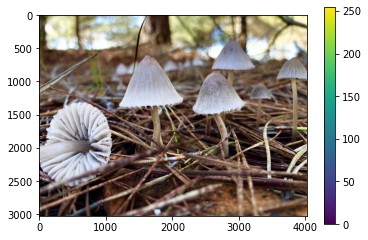

(12192768, 3)


In [4]:
image = natural_color_image("mushrooms.jpg")
display_image(image)

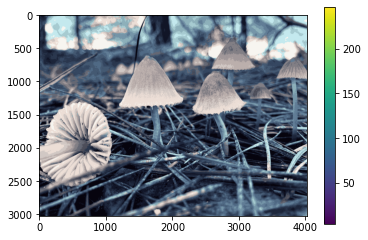

In [5]:
seg_im = segment_kmeans(image, k=20)
segmented_image_natural = cv2.cvtColor(seg_im, cv2.COLOR_RGB2BGR)
display_image(segmented_image_natural)

In [6]:
save_image(segmented_image_natural, "mushrooms_seg_20.jpg")

In [107]:
def foreground_extractor(image_path, rectangle, image=None):
    #https://www.geeksforgeeks.org/python-foreground-extraction-in-an-image-using-grabcut-algorithm/
    # Python program to illustrate
    # foreground extraction using
    # GrabCut algorithm

    # organize imports
    import numpy as np
    import cv2
    from matplotlib import pyplot as plt

    # path to input image specified and
    # image is loaded with imread command
    image = cv2.imread(image_path) if image_path else image

    # create a simple mask image similar
    # to the loaded image, with the
    # shape and return type
    mask = np.zeros(image.shape[:2], np.uint8)

    # specify the background and foreground model
    # using numpy the array is constructed of 1 row
    # and 65 columns, and all array elements are 0
    # Data type for the array is np.float64 (default)
    backgroundModel = np.zeros((1, 65), np.float64)
    foregroundModel = np.zeros((1, 65), np.float64)

    # define the Region of Interest (ROI)
    # as the coordinates of the rectangle
    # where the values are entered as
    # (startingPoint_x, startingPoint_y, width, height)
    # these coordinates are according to the input image
    # it may vary for different images
    #rectangle -- parameterized

    # apply the grabcut algorithm with appropriate
    # values as parameters, number of iterations = 3
    # cv2.GC_INIT_WITH_RECT is used because
    # of the rectangle mode is used
    cv2.grabCut(image, mask, rectangle, 
                backgroundModel, foregroundModel,
                3, cv2.GC_INIT_WITH_RECT)

    # In the new mask image, pixels will
    # be marked with four flags
    # four flags denote the background / foreground
    # mask is changed, all the 0 and 2 pixels
    # are converted to the background
    # mask is changed, all the 1 and 3 pixels
    # are now the part of the foreground
    # the return type is also mentioned,
    # this gives us the final mask
    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

    # The final mask is multiplied with
    # the input image to give the segmented image.
    image = image * mask2[:, :, np.newaxis]
    
    display_image(image)
    
    return image, mask2

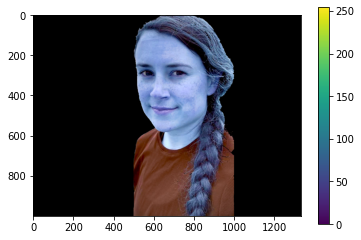

In [8]:
        img_face, mask_face = foreground_extractor(image_path='emily_portrait.jpg', rectangle=(500, 0, 500, 1000))

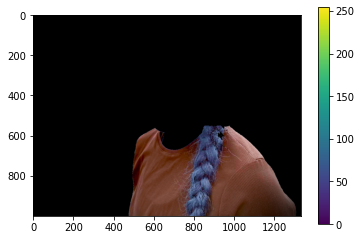

In [9]:
img_body, mask_body = foreground_extractor(image_path="emily_portrait.jpg", rectangle=(450, 550, 920, 450))

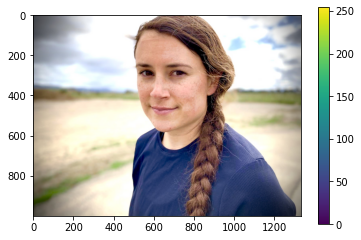

In [10]:
display_image(natural_color_image("emily_portrait.jpg"))

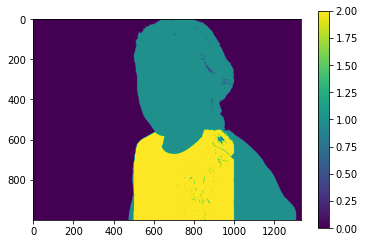

In [11]:
mask_full = mask_face + mask_body
display_image(mask_full)

In [18]:
#print(mask_full.shape)
#print(type(mask_full))
unique_elements = np.unique(mask_full)
print(unique_elements)

#make it binary
mask_full[mask_full==2] = 1

[0 1 2]


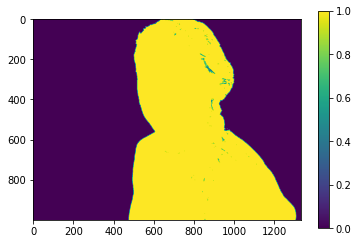

In [19]:
display_image(mask_full)

In [26]:
mask_full_smooth = cv2.blur(mask_full, (15, 15))

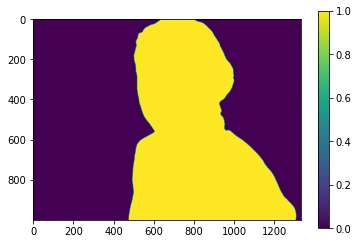

In [375]:
display_image(mask_full_smooth)
save_image(mask_full_smooth*255, "mask_full_smooth.png")

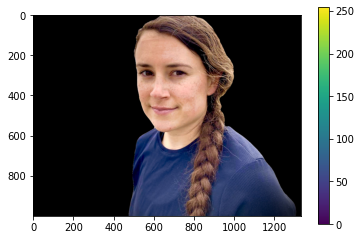

In [367]:
emily = mask_full_smooth[:, :, np.newaxis]*natural_color_image("emily_portrait.jpg")
display_image(emily)
save_image(natural_color(emily), "emily.png")

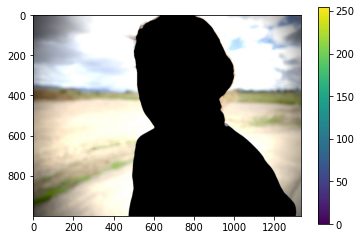

In [368]:
inverted_mask_full_smooth = np.logical_not(mask_full_smooth)
background = inverted_mask_full_smooth[:, :, np.newaxis]*natural_color_image("emily_portrait.jpg")
display_image(background)
save_image(natural_color(background), "background.png")

In [43]:
emily_blur = cv2.blur(emily, (5, 5))
segmented_emily_30 = segment_kmeans(emily_blur)

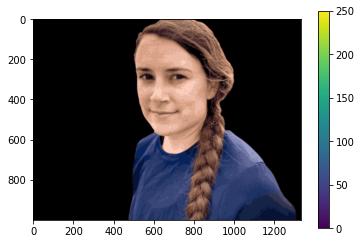

In [44]:
display_image(segmented_emily_30)

In [45]:
#segmented_emily_30_blur = cv2.blur(segmented_emily_30, (5, 5))
save_image(segmented_emily_30, "segmented_emily_30.jpg")

In [48]:
segmented_background_10 = segment_kmeans(background, k=10)

In [49]:
save_image(segmented_background_10, "segmented_background_10.jpg")

In [51]:
combination_test = segmented_background_10 + segmented_emily_30
combination_test_natural_color = cv2.cvtColor(combination_test, cv2.COLOR_BGR2RGB)
save_image(combination_test_natural_color, "combination_test_natural_color.jpg")

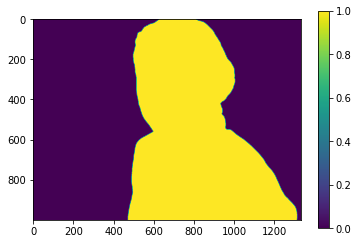

In [59]:
def buffer_mask(mask, buffer=10):
    mask_250 = mask * 250
    mask_250_blur = cv2.blur(mask_250, (buffer, buffer))
    mask_250_blur[mask_250_blur>0]=1
    return mask_250_blur

mask_buffer = buffer_mask(mask_full_smooth)
display_image(mask_buffer)

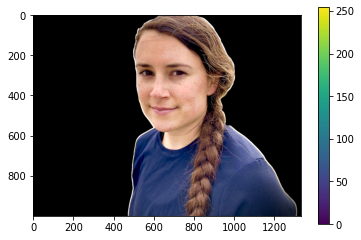

In [370]:
emily_buffer = mask_buffer[:, :, np.newaxis]*natural_color_image("emily_portrait.jpg")
display_image(emily_buffer)
save_image(natural_color(emily_buffer), "emily_buffer.png")

In [84]:
def blur(_im, radius=5):
    return cv2.blur(_im, (radius, radius))

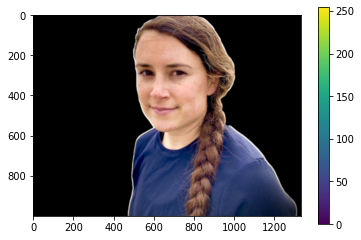

In [67]:
emily_buffer_blur = blur(emily_buffer, 5)
display_image(emily_buffer_blur)

In [73]:
segmented_emily_blur_30 = segment_kmeans(emily_buffer_blur, k=30)

In [74]:
save_image(segmented_emily_blur_30, "segmented_emily_blur_30.jpg")

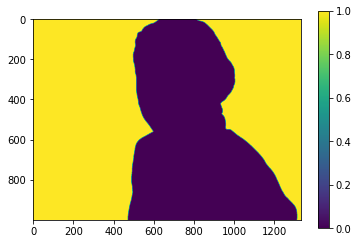

In [384]:
mask_buffer_inverse = np.logical_not(mask_buffer)
display_image(mask_buffer_inverse)

In [79]:
final_image = np.maximum(segmented_background_10, segmented_emily_blur_30)       
final_image_natural_color = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
save_image(final_image_natural_color, "final_image.jpg")

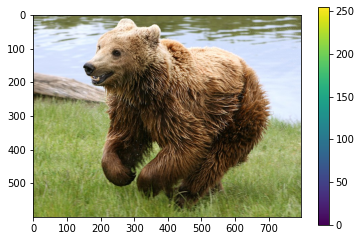

In [80]:
bear = natural_color_image("bear.jpg")
display_image(bear)

In [87]:
bear_blur = blur(bear)

In [90]:
segmented_bear_10 = segment_kmeans(bear_blur, 10)

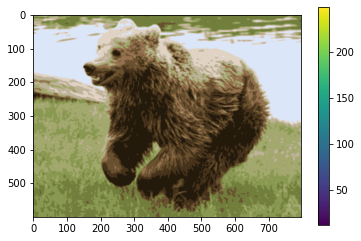

In [91]:
display_image(segmented_bear_10)

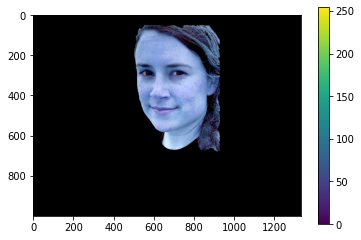

In [100]:
img_face_2, mask_face_2 = foreground_extractor(image_path="emily_portrait.jpg", rectangle=(500, 50, 430, 630))

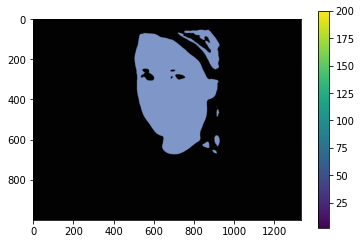

In [128]:
blur_face = blur(img_face_2, 20)
segmented_face = segment_kmeans(blur_face, 2)
display_image(segmented_face)

In [170]:
def pbn_colors():
    import matplotlib
    emily_colors = {
        1: "mediumorchid",
        2: "black",
        3: "orange",
        4: "deepskyblue",
        5: "palegreen",
        6: "navy",
        7: "mintcream",
        8: "azure",
        9: "seagreen",
        10: "salmon",
        11: "mistyrose",
        12: "mediumaquamarine",
        13: "yellow",
        14: "darkkhaki",
        15: "snow",
        16: "peru",
        17: "gold",
        18: "bisque",
        19: "red",
        20: "orchid",
        21: "blueviolet",
        22: "mediumpurple",
        23: "thistle",
        24: "pink",
    }
    return {
        k: matplotlib.colors.to_rgb(v)
        for k, v in emily_colors.items()
    }

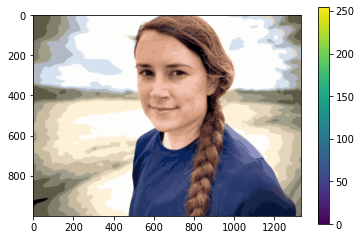

In [147]:
orig = natural_color_image("final_image.jpg")
display_image(orig)

In [199]:
def unique_colors(_im, return_counts=False):
    return np.unique(_im.reshape(-1, _im.shape[2]), axis=0, return_counts=return_counts)

emily_blur_30_colors, emily_blur_30_counts = unique_colors(segmented_emily_blur_30, return_counts=True)
print(len(emily_blur_30_colors))

30


In [180]:
from math import sqrt

our_colors = [[255*v_i for v_i in v] for k, v in pbn_colors().items()]

def closest_color(rgb):
    r, g, b = rgb
    color_diffs = []
    for color in our_colors:
        cr, cg, cb = color
        color_diff = sqrt((r - cr)**2 + (g - cg)**2 + (b - cb)**2)
        color_diffs.append((color_diff, color))
    return min(color_diffs)[1]

print(our_colors)

[[186.0, 85.0, 211.0], [0.0, 0.0, 0.0], [255.0, 165.0, 0.0], [0.0, 191.0, 255.0], [152.0, 251.0, 152.0], [0.0, 0.0, 128.0], [245.0, 255.0, 250.0], [240.0, 255.0, 255.0], [46.0, 139.0, 87.0], [250.0, 128.0, 114.0], [255.0, 228.0, 225.0], [102.0, 205.0, 170.0], [255.0, 255.0, 0.0], [189.0, 183.0, 107.0], [255.0, 250.0, 250.0], [205.0, 133.0, 63.0], [255.0, 215.0, 0.0], [255.0, 228.0, 196.0], [255.0, 0.0, 0.0], [218.0, 112.0, 214.0], [138.0, 43.0, 226.0], [147.0, 112.0, 219.0], [216.0, 191.0, 216.0], [255.0, 192.0, 203.0]]


In [234]:
def color_map(_im_colors):
    _map = {}
    for color in _im_colors:
        _map[tuple(color)] = closest_color(color)
    return _map

color_translation_emily_blur_30 = color_map(emily_blur_30_colors)

In [235]:
for k, v in color_translation_emily_blur_30.items(): print("{} = {}".format(k, v))

(0, 0, 0) = [0.0, 0.0, 0.0]
(9, 21, 57) = [0.0, 0.0, 0.0]
(11, 38, 95) = [0.0, 0.0, 128.0]
(25, 39, 75) = [0.0, 0.0, 128.0]
(28, 11, 14) = [0.0, 0.0, 0.0]
(37, 55, 103) = [0.0, 0.0, 128.0]
(50, 26, 30) = [0.0, 0.0, 0.0]
(50, 65, 114) = [46.0, 139.0, 87.0]
(59, 60, 93) = [46.0, 139.0, 87.0]
(61, 44, 55) = [0.0, 0.0, 0.0]
(66, 77, 126) = [46.0, 139.0, 87.0]
(74, 40, 34) = [0.0, 0.0, 0.0]
(90, 54, 47) = [46.0, 139.0, 87.0]
(90, 69, 75) = [46.0, 139.0, 87.0]
(96, 104, 152) = [147.0, 112.0, 219.0]
(105, 98, 106) = [46.0, 139.0, 87.0]
(108, 68, 55) = [46.0, 139.0, 87.0]
(122, 82, 67) = [46.0, 139.0, 87.0]
(138, 97, 77) = [205.0, 133.0, 63.0]
(140, 145, 189) = [147.0, 112.0, 219.0]
(152, 111, 91) = [205.0, 133.0, 63.0]
(153, 142, 138) = [189.0, 183.0, 107.0]
(171, 126, 101) = [205.0, 133.0, 63.0]
(189, 185, 189) = [216.0, 191.0, 216.0]
(190, 140, 112) = [189.0, 183.0, 107.0]
(208, 154, 127) = [189.0, 183.0, 107.0]
(222, 167, 140) = [189.0, 183.0, 107.0]
(230, 181, 158) = [255.0, 192.0, 203.0]

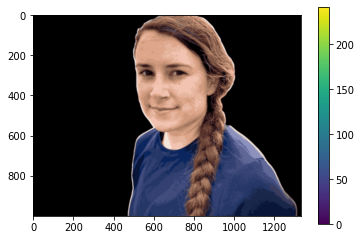

In [246]:
#save_image(segmented_emily_blur_30, "segmented_emily_blur_30.png")
test_img = cv2.imread("segmented_emily_blur_30.png")
test_unique = unique_colors(test_img)
#print(test_unique)
display_image(test_img)

In [247]:
def replace_color(array, initial, final):
    r1, g1, b1 = initial
    r2, g2, b2 = final
    red, green, blue = array[:,:,0], array[:,:,1], array[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    array[:,:,:3][mask] = [r2, g2, b2]

In [248]:
def replace_colors(_im, _map):
    for init_color, final_color in _map.items():
        replace_color(_im, init_color, final_color)

[[  0   0   0]
 [  0   0 128]
 [ 46 139  87]
 [147 112 219]
 [189 183 107]
 [205 133  63]
 [216 191 216]
 [255 192 203]
 [255 228 225]]


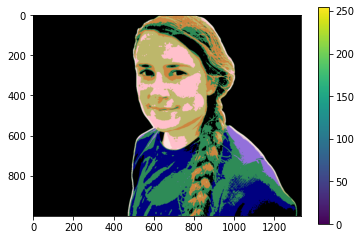

In [249]:
replace_colors(test_img, _map=color_translation_emily_blur_30)
print(unique_colors(test_img))
display_image(test_img)
save_image(natural_color(test_img), "test_img.jpg")

In [250]:
#save_image(segmented_background_10, "segmented_background_10.png")

In [251]:
test_back = load_image("segmented_background_10.png")
unique_back = unique_colors(test_back)
back_map = color_map(unique_back)
print(back_map)

{(0, 0, 0): [0.0, 0.0, 0.0], (91, 91, 71): [46.0, 139.0, 87.0], (130, 127, 109): [189.0, 183.0, 107.0], (161, 158, 140): [189.0, 183.0, 107.0], (177, 185, 197): [216.0, 191.0, 216.0], (200, 187, 159): [189.0, 183.0, 107.0], (215, 226, 240): [240.0, 255.0, 255.0], (228, 214, 189): [255.0, 228.0, 196.0], (253, 242, 215): [255.0, 228.0, 225.0], (253, 254, 251): [255.0, 250.0, 250.0]}


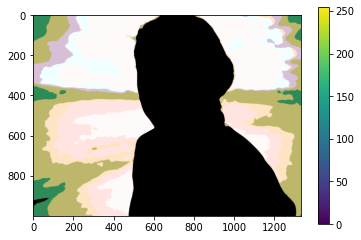

In [252]:
replace_colors(test_back, back_map)
unique_back_result = unique_colors(test_back)
display_image(test_back)

In [327]:
def combine(foreground, background):
    return np.maximum(foreground, background)  

def show_color(color_rgb):
    import matplotlib.pyplot as plt
    plt.imshow([[color_rgb]])

In [254]:
test_combined = combine(test_img, test_back)
save_image(natural_color(test_combined), "test_combined.png")

In [314]:
def pbn_colors_rgb():
    import matplotlib
    emily_colors = {
        1: "mediumorchid",
        2: "black",
        3: "orange",
        4: "deepskyblue",
        5: "palegreen",
        6: "navy",
        7: "mintcream",
        8: "azure",
        9: "seagreen",
        10: "salmon",
        11: "mistyrose",
        12: "mediumaquamarine",
        13: "yellow",
        14: "darkkhaki",
        15: "snow",
        16: "peru",
        17: "gold",
        18: "bisque",
        19: "red",
        20: "orchid",
        21: "blueviolet",
        22: "mediumpurple",
        23: "thistle",
        24: "pink",
    }
    return {
        k: tuple(matplotlib.colors.to_rgb(v))
        for k, v in emily_colors.items()
    }

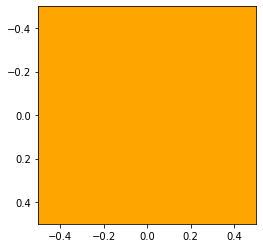

In [333]:
orange = pbn_colors_rgb()[3]
show_color(orange)
import matplotlib
pbn_colors_hsv = {
    k: matplotlib.colors.rgb_to_hsv(v) for k, v in pbn_colors_rgb().items()
}

In [356]:
fore_01 = load_image("segmented_emily_blur_30.png")
fore_rgb_decimal = unique_colors(fore_01)/255
fore_hsv_unique = []
fore_hsv_lookup = {}
for rgb_decimal in fore_rgb_decimal:
    fore_hsv_unique.append(tuple(matplotlib.colors.rgb_to_hsv(rgb_decimal)))
    fore_hsv_lookup[tuple(matplotlib.colors.rgb_to_hsv(rgb_decimal))] = tuple(rgb_decimal*255)
print(fore_hsv_lookup)

{(0.0, 0.0, 0.0): (0.0, 0.0, 0.0), (0.625, 0.8421052631578947, 0.2235294117647059): (9.0, 21.0, 57.0), (0.613095238095238, 0.8842105263157894, 0.37254901960784315): (11.0, 38.0, 95.0), (0.62, 0.6666666666666667, 0.29411764705882354): (25.0, 39.0, 75.0), (0.9705882352941176, 0.6071428571428571, 0.10980392156862745): (28.0, 11.0, 14.0), (0.6212121212121212, 0.6407766990291262, 0.403921568627451): (37.0, 55.0, 103.0), (0.9722222222222222, 0.48, 0.19607843137254902): (50.0, 26.0, 30.0), (0.6276041666666666, 0.5614035087719298, 0.4470588235294118): (50.0, 65.0, 114.0), (0.6617647058823529, 0.3655913978494623, 0.36470588235294116): (59.0, 60.0, 93.0), (0.892156862745098, 0.27868852459016397, 0.23921568627450981): (61.0, 44.0, 55.0), (0.6361111111111112, 0.47619047619047616, 0.49411764705882355): (66.0, 77.0, 126.0), (0.024999999999999994, 0.5405405405405406, 0.2901960784313726): (74.0, 40.0, 34.0), (0.027131782945736416, 0.4777777777777778, 0.35294117647058826): (90.0, 54.0, 47.0), (0.952380

In [362]:
def closest_hsv_color(hsv):
    r, g, b = hsv
    color_diffs = []
    for color in our_hsv_colors:
        cr, cg, cb = color
        color_diff = sqrt((r - cr)**2 + (g - cg)**2 + (b - cb)**2)
        color_diffs.append((color_diff, color))
    return min(color_diffs)[1]

def color_map_hsv(_im_colors):
    _map = {}
    for color in _im_colors:
        _map[tuple(color)] = tuple(closest_hsv_color(color))
    return _map


our_hsv_colors = pbn_colors_hsv.values()
map_fore_hsv = color_map_hsv(fore_hsv_unique)
#unique_v_s = []
map_fore_source_our_rgb = {}
for k, v in map_fore_hsv.items():
    map_fore_source_our_rgb[fore_hsv_lookup[k]] = tuple(255*matplotlib.colors.hsv_to_rgb(v))
    # eventually change value to just the our color index once things look good
    
    #if v not in unique_v_s: unique_v_s.append(v)
for k, v in map_fore_source_our_rgb.items():
    print("{} == {}".format(k, v))

(0.0, 0.0, 0.0) == (0.0, 0.0, 0.0)
(9.0, 21.0, 57.0) == (0.0, 0.0, 128.0)
(11.0, 38.0, 95.0) == (0.0, 0.0, 128.0)
(25.0, 39.0, 75.0) == (46.00000000000001, 139.0, 87.0)
(28.0, 11.0, 14.0) == (0.0, 0.0, 128.0)
(37.0, 55.0, 103.0) == (46.00000000000001, 139.0, 87.0)
(50.0, 26.0, 30.0) == (185.99999999999997, 85.00000000000001, 211.0)
(50.0, 65.0, 114.0) == (46.00000000000001, 139.0, 87.0)
(59.0, 60.0, 93.0) == (46.00000000000001, 139.0, 87.0)
(61.0, 44.0, 55.0) == (216.0, 191.0, 216.0)
(66.0, 77.0, 126.0) == (46.00000000000001, 139.0, 87.0)
(74.0, 40.0, 34.0) == (46.00000000000001, 139.0, 87.0)
(90.0, 54.0, 47.0) == (189.0, 183.0, 106.99999999999999)
(90.0, 69.0, 75.0) == (216.0, 191.0, 216.0)
(96.0, 104.0, 152.0) == (147.0, 111.99999999999999, 219.0)
(105.0, 98.0, 106.0) == (216.0, 191.0, 216.0)
(108.0, 68.0, 55.0) == (189.0, 183.0, 106.99999999999999)
(122.0, 82.0, 67.0) == (189.0, 183.0, 106.99999999999999)
(138.0, 97.0, 77.0) == (189.0, 183.0, 106.99999999999999)
(140.0, 145.0, 189.0

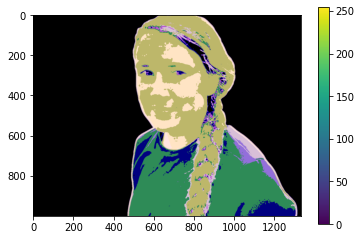

In [364]:
replace_colors(fore_01, map_fore_source_our_rgb)
display_image(fore_01)
save_image(natural_color(fore_01), "fore_01.png")